In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

2024-09-05 01:14:16.690476: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-05 01:14:16.690561: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-05 01:14:16.690613: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-05 01:14:16.701609: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
!pip install --upgrade matplotlib seaborn numpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)


In [3]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [4]:
train_df = pd.read_csv('../newKDDTrain+.txt', header=None)

columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
# Rename the columns of the DataFrame
train_df.columns = columns

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
test_df = pd.read_csv('../newKDDTest+.txt', header=None)

test_columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
# Rename the columns of the DataFrame
test_df.columns = columns

test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [6]:
df = pd.concat([train_df, test_df])

In [7]:
df['class']

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
22539     normal
22540     normal
22541    anomaly
22542     normal
22543    anomaly
Name: class, Length: 148517, dtype: object

In [8]:
df.isnull().values.any()

False

In [9]:
len(df.columns)

42

In [10]:
df.shape

(148517, 42)

In [11]:
# 'label' 열의 값이 'normal.'이면 0으로, 'normal.'이 아니면 1로 변경
df['class'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

# 변경된 데이터프레임 확인
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [12]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['service'] = label_encoder.fit_transform(df['service'])
df['flag'] = label_encoder.fit_transform(df['flag'])

# 인코딩된 데이터프레임 확인
print(df.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.

In [13]:
df.shape

(148517, 42)

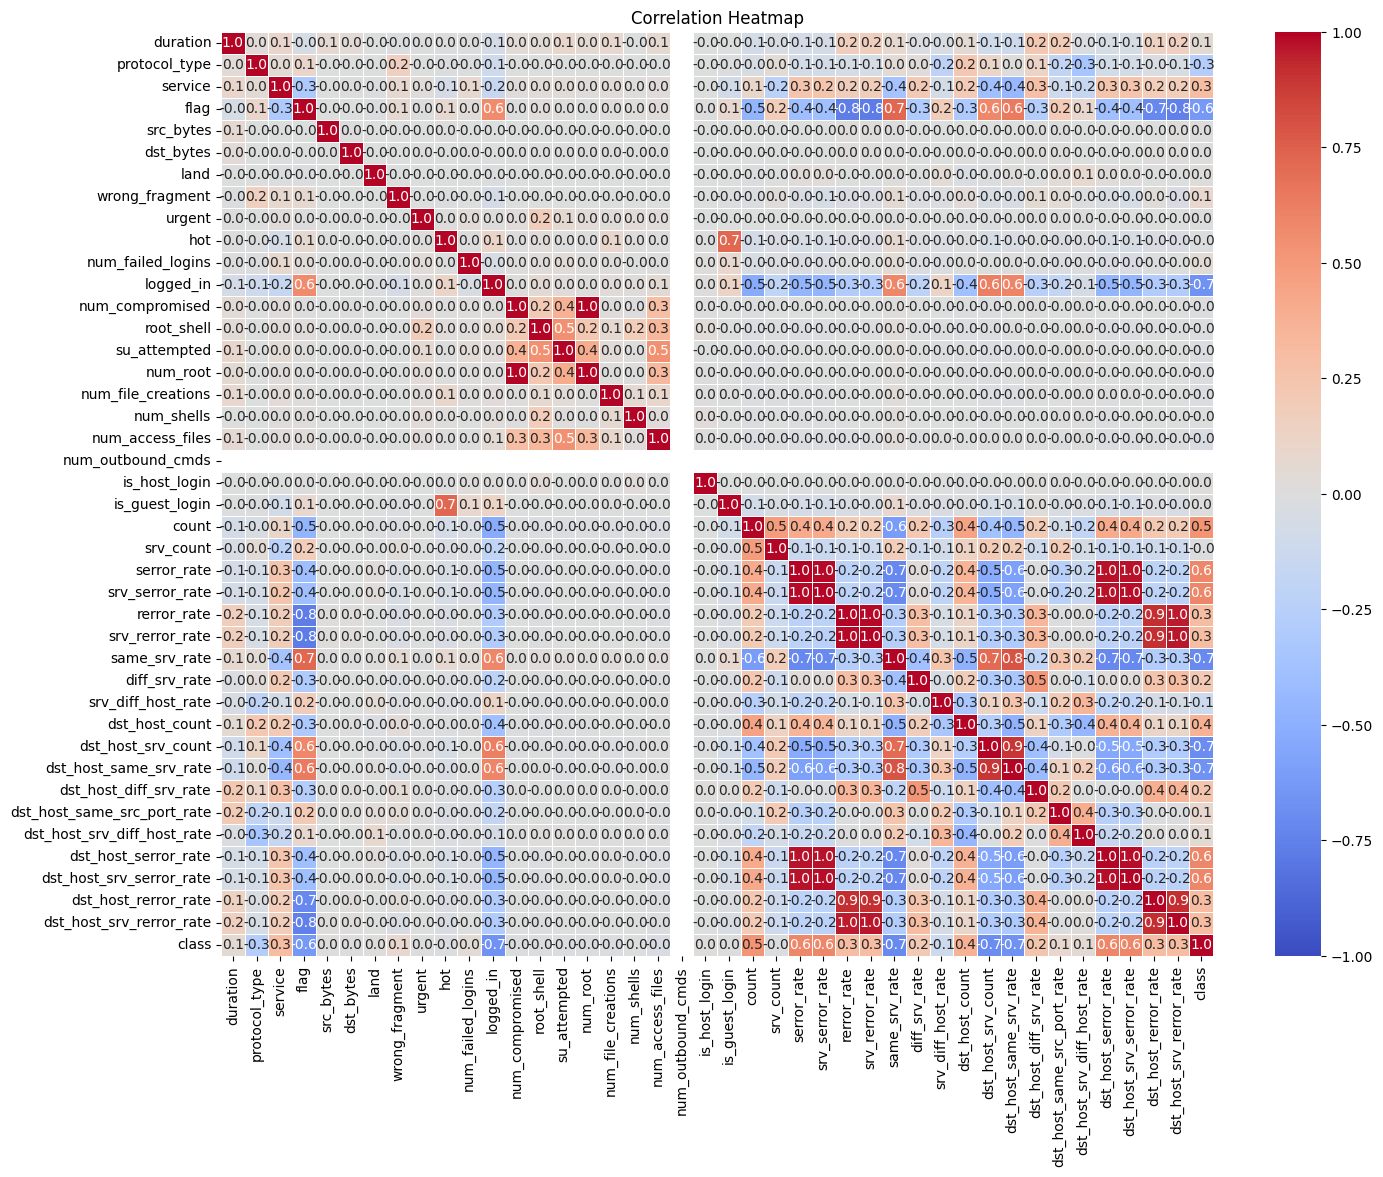

In [14]:
# 상관계수 계산
corr = df.corr()

# 히트맵 그리기
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((133665, 42), (14852, 42))

In [16]:
X_train_normal = X_train[X_train['class'] == 0]
X_train_normal.shape

X_test_normal = X_test[X_test['class'] == 0]
X_test_normal.shape

(7720, 42)

In [17]:
y_train_normal = X_train_normal['class']
X_train_normal = X_train_normal.drop(labels='class',axis=1)

y_test_normal = X_test_normal['class']
X_test_normal = X_test_normal.drop(labels='class',axis=1)

In [18]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import pandas as pd

# StandardScaler와 PCA 진행은 동일
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train_normal)
test_X_scaled = scaler.transform(X_test_normal)

# PCA 수행
num_components = 20  # 20개의 주성분 사용
pca = PCA(n_components=num_components)
train_X_pca = pca.fit_transform(train_X_scaled)
test_X_pca = pca.transform(test_X_scaled)

# SelectKBest로 상위 20개의 특성 선택
feature_selector = SelectKBest(score_func=f_classif, k=20)
train_X_selected = feature_selector.fit_transform(train_X_pca, y_train_normal)
test_X_selected = feature_selector.transform(test_X_pca)

# 원래 특성 이름 (train_X_scaled.shape[1]에 맞게 조정)
original_feature_names = X_train_normal.columns[:train_X_scaled.shape[1]]

# PCA 주성분에 대한 각 원래 특성의 기여도 (loading)
loading_matrix = pd.DataFrame(pca.components_.T, 
                              columns=[f'PC{i}' for i in range(num_components)], 
                              index=original_feature_names)

# 상위 K개의 주성분이 선택된 특성의 기여도를 확인
selected_pca_features = feature_selector.get_support(indices=True)
selected_pca_loading = loading_matrix.iloc[:, selected_pca_features]

print("PCA Components Loading Matrix for Selected Features:")
print(selected_pca_loading)

PCA Components Loading Matrix for Selected Features:
                                  PC0           PC1           PC2  \
duration                     0.028593  2.365132e-01 -5.718255e-02   
protocol_type               -0.065426 -3.979844e-03 -4.414694e-01   
service                      0.003369  2.598208e-01  1.183623e-01   
flag                        -0.430063  4.185050e-02  3.563048e-02   
src_bytes                   -0.001693  2.613161e-02  9.676689e-03   
dst_bytes                   -0.002591  4.888551e-02  4.477910e-02   
land                         0.010131  2.048508e-02  1.598369e-02   
wrong_fragment               0.000064  1.665890e-02 -1.979228e-02   
urgent                       0.000435  1.957446e-02  9.796900e-03   
hot                         -0.008899  8.449010e-02  3.658889e-02   
num_failed_logins            0.004985  3.727084e-02  8.650871e-03   
logged_in                   -0.129380 -8.730279e-02  4.400952e-01   
num_compromised              0.003252  1.148231e-0

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [19]:
# 선택된 PCA 주성분에 기여한 원래 특성의 column명 가져오기
selected_feature_names = original_feature_names[selected_pca_features]

# 선택된 column명 출력
print("Selected Feature Names:")
print(selected_feature_names)

Selected Feature Names:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds'],
      dtype='object')


In [20]:
print(train_X_selected)

[[-0.33990151 -0.75752856  0.92914731 ... -0.27328392 -0.05914578
   0.05811499]
 [-0.82090851 -0.9665431   0.44901889 ...  0.3743919   0.0409114
  -0.14756947]
 [-0.01265718  0.94663902  0.49426731 ... -0.51686373  0.0576568
  -0.46471676]
 ...
 [-0.71092194  0.30934622  1.22551357 ...  0.38079473 -0.27440058
   0.70161729]
 [-0.6719105   1.09887075  0.72240983 ... -0.1292149   0.0867369
  -0.46522281]
 [-1.15175186 -1.71203069 -4.20674948 ... -0.21413023 -0.0302546
   0.23142839]]


In [21]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input parts of the pattern
        seq_x = sequences[i:end_ix, :-1]
        # get the 'class' value from the last entry in the sequence
        seq_y = sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [22]:
# Merge train and test X/y data to apply sequence transformation function

timestamp = 3


y_train_array = np.array(y_train_normal)
train_set = np.c_[train_X_selected, y_train_array]

y_test_array = np.array(y_test_normal)
test_set = np.c_[test_X_selected, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train_normal_selected, y_train_normal_selected = split_sequences(train_set, timestamp)
print(X_train_normal_selected.shape, y_train_normal_selected.shape)

X_test_normal_selected, y_test_normal_selected = split_sequences(test_set, timestamp)
print(X_test_normal_selected.shape, y_test_normal_selected.shape)


(69332, 3, 20) (69332,)
(7718, 3, 20) (7718,)


X_train.shape, y_train.shape

#reshape inputs for LSTM [samples, timesteps, features]

X_train_ft = X_train_ft.reshape(X_train_ft.shape[0], 1, X_train_ft.shape[1])
print("Training data shape:", X_train_ft.shape)

X_test_ft = X_test_ft.reshape(X_test_ft.shape[0], 1, X_test_ft.shape[1])
print("Test data shape:", X_test_ft.shape)


X_train = X_train_ft
X_test = X_test_ft

In [23]:
!pip install keras_self_attention

Defaulting to user installation because normal site-packages is not writeable


In [24]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention
from keras.callbacks import EarlyStopping

from keras import layers, models
import tensorflow as tf
import numpy as np
from keras import backend as K

latent_dim = 5
inter_dim = 32

# 샘플링 함수 (reparameterization trick)
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Encoder 생성 함수
def create_encoder(input_dim, conditional_dim, latent_dim):
    input_data = layers.Input(shape=(input_dim,))
    conditional_input = layers.Input(shape=(conditional_dim,))

    # Concatenate input and condition
    concatenated_input = layers.Concatenate()([input_data, conditional_input])

    # Define the encoder network
    h = layers.Dense(128, activation='relu')(concatenated_input)
    h = layers.Dense(64, activation='relu')(h)

    # Mean and variance for latent space
    z_mean = layers.Dense(latent_dim)(h)
    z_log_var = layers.Dense(latent_dim)(h)

    # Lambda layer for reparameterization trick
    z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    return models.Model([input_data, conditional_input], [z_mean, z_log_var, z], name="encoder")

# Decoder 생성 함수
def create_decoder(latent_dim, conditional_dim, output_dim):
    latent_inputs = layers.Input(shape=(latent_dim,))
    conditional_input = layers.Input(shape=(conditional_dim,))

    # Concatenate latent space and condition
    concatenated_input = layers.Concatenate()([latent_inputs, conditional_input])

    # Define the decoder network
    h = layers.Dense(64, activation='relu')(concatenated_input)
    h = layers.Dense(128, activation='relu')(h)
    output = layers.Dense(output_dim, activation='sigmoid')(h)

    return models.Model([latent_inputs, conditional_input], output, name="decoder")

# CVAE 클래스 정의
class CVAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(CVAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        data_input, conditional_input = inputs
        z_mean, z_log_var, z = self.encoder([data_input, conditional_input])
        reconstructed = self.decoder([z, conditional_input])
        return reconstructed, z_mean, z_log_var

    def compute_loss(self, data_input, reconstructed, z_mean, z_log_var):
        reconstruction_loss = tf.reduce_mean(
            tf.keras.losses.mean_squared_error(data_input, reconstructed)
        )
        kl_loss = -0.5 * tf.reduce_mean(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        )
        total_loss = reconstruction_loss + kl_loss
        return total_loss

    def train_step(self, data):
        data_input, conditional_input = data
        with tf.GradientTape() as tape:
            reconstructed, z_mean, z_log_var = self([data_input, conditional_input])
            loss = self.compute_loss(data_input, reconstructed, z_mean, z_log_var)
        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {"loss": loss}

# 모델 설정
input_dim = X_train_normal_selected.shape[1]
conditional_dim = 1  # y_train의 차원을 맞게 설정
latent_dim = 2  # Latent space dimensionality

encoder = create_encoder(input_dim, conditional_dim, latent_dim)
decoder = create_decoder(latent_dim, conditional_dim, input_dim)
cvae = CVAE(encoder, decoder)

cvae.compile(optimizer=tf.keras.optimizers.Adam())

# 모델 학습
history = cvae.fit([X_train_normal_selected, y_train_normal_selected], epochs=50, batch_size=128)

In [ ]:
latent_dim = 5
inter_dim = 32

def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

def vae_loss(x, x_decoded_mean, z_mean, z_log_sigma):
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
    kl_loss = -0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    total_loss = K.mean(reconstruction_loss + kl_loss)
    return total_loss

def cvae(X):
    timesteps, features = X.shape[1], X.shape[2]
    input_x = Input(shape=(timesteps, features), name='InputTimeSeries')

    # intermediate dimension
    h = Conv1D(filters=64, kernel_size=5, padding="same", strides=1, activation="selu")(input_x)
    h = Conv1D(filters=32, kernel_size=5, padding="same", strides=1, activation="selu")(h)
    h = Conv1D(filters=16, kernel_size=5, padding="same", strides=1, activation="selu")(h)
    h = LSTM(inter_dim, activation='selu', return_sequences=True)(h)
    h = SeqSelfAttention(attention_activation='sigmoid')(h)
    h = LSTM(inter_dim, activation='selu', return_sequences=False)(h)
    h = Dense(inter_dim, activation='selu')(h)
    h = Dense(inter_dim, activation='selu')(h)

    # z_layer
    z_mean = Dense(latent_dim)(h)
    z_log_sigma = Dense(latent_dim)(h)
    z = Lambda(sampling)([z_mean, z_log_sigma])

    # Reconstruction decoder
    decoder1 = RepeatVector(timesteps)(z)
    decoder1 = Dense(inter_dim, activation='selu')(decoder1)
    decoder1 = Dense(inter_dim, activation='selu')(decoder1)
    decoder1 = LSTM(inter_dim, activation='selu', return_sequences=True)(decoder1)
    decoder1 = LSTM(inter_dim, activation='selu', return_sequences=True)(decoder1)
    decoder1 = SeqSelfAttention(attention_activation='sigmoid')(decoder1)
    decoder1 = Conv1DTranspose(filters=16, kernel_size=5, padding="same", strides=1, activation="selu")(decoder1)
    decoder1 = Conv1DTranspose(filters=32, kernel_size=5, padding="same", strides=1, activation="selu")(decoder1)
    decoder1 = Conv1DTranspose(filters=64, kernel_size=5, padding="same", strides=1, activation="selu")(decoder1)
    decoder1 = TimeDistributed(Dense(features))(decoder1)
    model = Model(input_x, decoder1)

    model.add_loss(vae_loss(input_x, decoder1, z_mean, z_log_sigma))
    return model

model = cvae(X_train_normal_selected)
model.compile(optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(X_train_normal_selected, X_train_normal_selected,
                    shuffle=True,
                    epochs=100,
                    validation_split=0.05,
                    batch_size=32).history

2024-09-05 01:14:33.088086: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:8c:00.0, compute capability: 8.0
2024-09-05 01:14:33.090315: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:cd:00.0, compute capability: 8.0


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 InputTimeSeries (InputLaye  [(None, 3, 20)]              0         []                            
 r)                                                                                               
                                                                                                  
 conv1d (Conv1D)             (None, 3, 64)                6464      ['InputTimeSeries[0][0]']     
                                                                                                  
 conv1d_1 (Conv1D)           (None, 3, 32)                10272     ['conv1d[0][0]']              
                                                                                                  
 conv1d_2 (Conv1D)           (None, 3, 16)                2576      ['conv1d_1[0][0]']        

                                                                                                  
 tf.math.reduce_sum (TFOpLa  ()                           0         ['tf.math.square[0][0]']      
 mbda)                                                                                            
                                                                                                  
 tf.math.multiply (TFOpLamb  (None,)                      0         ['tf.math.reduce_sum_1[0][0]']
 da)                                                                                              
                                                                                                  
 tf.__operators__.add_1 (TF  (None,)                      0         ['tf.math.reduce_sum[0][0]',  
 OpLambda)                                                           'tf.math.multiply[0][0]']    
                                                                                                  
 tf.math.r

2024-09-05 01:14:40.304574: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-09-05 01:14:41.489072: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fbe28d2be10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-05 01:14:41.489110: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-09-05 01:14:41.489119: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-09-05 01:14:41.494554: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-05 01:14:41.582396: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2059/2059 [==============================] - 80s 34ms/step - loss: 2206.1587 - accuracy: 0.6022 - val_loss: 1216.4786 - val_accuracy: 0.6258
Epoch 2/100
2059/2059 [==============================] - 68s 33ms/step - loss: 1827.5222 - accuracy: 0.6400 - val_loss: 939.5778 - val_accuracy: 0.6297
Epoch 3/100
2059/2059 [==============================] - 68s 33ms/step - loss: 1735.5300 - accuracy: 0.6512 - val_loss: 842.0516 - val_accuracy: 0.6440
Epoch 4/100
2059/2059 [==============================] - 68s 33ms/step - loss: 1558.1343 - accuracy: 0.6793 - val_loss: 763.8452 - val_accuracy: 0.6788
Epoch 5/100
2059/2059 [==============================] - 68s 33ms/step - loss: 1492.7407 - accuracy: 0.6875 - val_loss: 705.3040 - val_accuracy: 0.7108
Epoch 6/100
2059/2059 [==============================] - 68s 33ms/step - loss: 1444.2766 - accuracy: 0.6910 - val_loss: 658.3318 - val_accuracy: 0.6995
Epoch 7/100
2059/2059 [==============================] - 69s 33ms/step - loss: 1448.0127 - accuracy

2059/2059 [==============================] - 68s 33ms/step - loss: 1091.4396 - accuracy: 0.7160 - val_loss: 469.6118 - val_accuracy: 0.7427
Epoch 57/100
 649/2059 [========>.....................] - ETA: 47s - loss: 923.7788 - accuracy: 0.7283

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2059/2059 [==============================] - 68s 33ms/step - loss: 1113.1172 - accuracy: 0.7138 - val_loss: 523.6339 - val_accuracy: 0.7204
Epoch 64/100
2059/2059 [==============================] - 68s 33ms/step - loss: 1079.4827 - accuracy: 0.7121 - val_loss: 461.5769 - val_accuracy: 0.7273
Epoch 65/100
2059/2059 [==============================] - 69s 33ms/step - loss: 1102.6077 - accuracy: 0.7084 - val_loss: 497.7198 - val_accuracy: 0.7024
Epoch 66/100
 965/2059 [=============>................] - ETA: 35s - loss: 1057.0383 - accuracy: 0.6983

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2059/2059 [==============================] - 68s 33ms/step - loss: 1128.1094 - accuracy: 0.7111 - val_loss: 520.7191 - val_accuracy: 0.7292
Epoch 68/100
2059/2059 [==============================] - 68s 33ms/step - loss: 5985.3242 - accuracy: 0.7043 - val_loss: 455.6924 - val_accuracy: 0.7374
Epoch 69/100
1913/2059 [==========================>...] - ETA: 4s - loss: 1095.2750 - accuracy: 0.7091

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [ ]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [ ]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [ ]:
X_test.shape

In [ ]:
valid_x_predictions = model.predict(X_test)
mse = np.mean(np.power(flatten(X_test) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test.tolist()})

In [ ]:
error_df

In [ ]:
error_df['true_class'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

# 데이터프레임 준비
true_class = error_df['true_class'].astype(str)
reconstruction_error = error_df['reconstruction_error']

# 박스 플롯 그리기
plt.figure(figsize=(8, 8))
plt.boxplot(
    [reconstruction_error[true_class == cls] for cls in sorted(true_class.unique())],
    labels=sorted(true_class.unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)

plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.show()


In [ ]:
print(error_df)

In [ ]:
# Flatten the 'true_class' column to remove the nested list structure
error_df['true_class'] = error_df['true_class'].apply(lambda x: x[0][0] if isinstance(x, list) else x)

# Ensure 'reconstruction_error' is of type float
error_df['reconstruction_error'] = error_df['reconstruction_error'].astype(float)

print(error_df)


In [ ]:
# 그래프 보고 threshold 결정
threshold = 0.0098

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
true_class_0 = error_df[error_df['true_class'] == 0]['reconstruction_error']
true_class_1 = error_df[error_df['true_class'] == 1]['reconstruction_error']

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a swarm plot equivalent using scatter plot
x_0 = np.random.normal(1, 0.04, size=len(true_class_0))  # Add jitter to x-axis for class 0
x_1 = np.random.normal(2, 0.04, size=len(true_class_1))  # Add jitter to x-axis for class 1

ax.scatter(x_0, true_class_0, color='blue', alpha=0.6, label='Class 0', edgecolor='w', s=50)
ax.scatter(x_1, true_class_1, color='orange', alpha=0.6, label='Class 1', edgecolor='w', s=50)

# Create boxplots
ax.boxplot([true_class_0, true_class_1], positions=[1, 2], widths=0.6, patch_artist=True, 
           showfliers=False, boxprops=dict(facecolor='None', color='black'),
           medianprops=dict(color='black'), whiskerprops=dict(color='black'))

# Set x-axis labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Class 0', 'Class 1'])

# Add a horizontal line at the threshold
ax.axhline(y=0.03, xmin=0.0, xmax=1, dashes=(5, 5), color='red')

# Set labels and title
ax.set_ylabel('Reconstruction Error')
ax.set_title('Reconstruction Error by Class')

plt.show()


In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
true_class_0 = error_df[error_df['true_class'] == 0]['reconstruction_error']
true_class_1 = error_df[error_df['true_class'] == 1]['reconstruction_error']

# Create the figure and axes
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()

# Create a swarm plot equivalent using scatter plot
x_0 = np.random.normal(1, 0.04, size=len(true_class_0))  # Add jitter to x-axis for class 0
x_1 = np.random.normal(2, 0.04, size=len(true_class_1))  # Add jitter to x-axis for class 1

ax.scatter(x_0, true_class_0, color='blue', alpha=0.6, label='Class 0', edgecolor='w', s=50)
ax.scatter(x_1, true_class_1, color='orange', alpha=0.6, label='Class 1', edgecolor='w', s=50)

# Create boxplots
ax.boxplot([true_class_0, true_class_1], positions=[1, 2], widths=0.6, patch_artist=True, 
           showcaps=False, boxprops=dict(facecolor='None', color='black'),
           medianprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=0))

# Set x-axis labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Class 0', 'Class 1'])

# Add a horizontal line at the threshold
plt.axhline(y=0.03, xmin=0.0, xmax=1.0, color='red', linestyle='--')

# Set labels and title
ax.set_ylabel('Reconstruction Error')
ax.set_title('Reconstruction Error by Class')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have already defined LABELS, threshold, and y_pred

LABELS = ["Attack", "Normal"]

y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

# Create the figure and axis
plt.figure(figsize=(12, 12))
fig, ax = plt.subplots()

# Plot the confusion matrix using imshow
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)

# Add color bar
plt.colorbar(cax)

# Set the labels for the axes
ax.set_xticks(np.arange(len(LABELS)))
ax.set_yticks(np.arange(len(LABELS)))

ax.set_xticklabels(LABELS)
ax.set_yticklabels(LABELS)

# Set labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix')

# Annotate the confusion matrix with the counts
for i in range(len(LABELS)):
    for j in range(len(LABELS)):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Extract true labels and reconstruction errors from the error_df DataFrame
true_labels = error_df['true_class'].values
reconstruction_errors = error_df['reconstruction_error'].values

# Calculate FPR, TPR, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, reconstruction_errors, pos_label=0)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test and reconstruction_error have been defined
fpr, tpr, thresholds = roc_curve(y_test, reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# If error_df.true_class is a nested structure, flatten it
y_test = error_df.true_class.apply(lambda x: int(x[0][0]) if isinstance(x, list) else int(x))

# Ensure y_pred is a list of integers
y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]

# Now calculate the metrics
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


In [ ]:
# Convert nested lists or arrays to flat integers
y_test = error_df['true_class'].apply(lambda x: int(x[0][0]) if isinstance(x, list) else int(x)).values

# Ensure that y_pred is also a flat array of integers
y_pred = np.array([0 if e > threshold else 1 for e in error_df.reconstruction_error.values], dtype=int)
